In [15]:
import numpy as np
import GPyOpt

#General imports
import numpy as np

#Operator Imports
from qiskit.opflow import Z, X, I, StateFn, CircuitStateFn, SummedOp
from qiskit.opflow.gradients import Gradient, NaturalGradient, QFI, Hessian

#Circuit imports
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter, ParameterVector, ParameterExpression
from qiskit.circuit.library import EfficientSU2

from qiskit import Aer
from qiskit.opflow import X, Z, I

#Operator Imports
from qiskit.opflow import StateFn, CircuitStateFn, SummedOp
from qiskit.opflow.gradients import Gradient, NaturalGradient, QFI, Hessian

from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal

- GPyOptの動作確認

In [7]:
def f(x):
    '''
    今回最適化する非線形関数
    '''
    return np.cos(1.5*x) + 0.1*x

In [8]:
bounds = [{'name': 'x', 'type': 'continuous', 'domain': (0,10)}]
myBopt = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds,initial_design_numdata=5,acquisition_type='LCB')

In [10]:
myBopt.run_optimization(max_iter=15)
print(myBopt.x_opt) #[ 2.05769988]
print(myBopt.fx_opt) #[-0.79271554]

[2.04994327]
-0.7927835353919437


- VQEの動作確認

In [14]:
seed = 50
algorithm_globals.random_seed = seed
grad = Gradient(grad_method='lin_comb')

qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)

H2_op = (-1.052373245772859 * I ^ I) + \
        (0.39793742484318045 * I ^ Z) + \
        (-0.39793742484318045 * Z ^ I) + \
        (-0.01128010425623538 * Z ^ Z) + \
        (0.18093119978423156 * X ^ X)

ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
slsqp = SLSQP(maxiter=1000) #slsqpインスタンスの呼び出し
vqe = VQE(ansatz, optimizer=slsqp, gradient=grad, quantum_instance=qi) #optimizerはVQEの引数に入れる
result = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(result)
optimizer_evals = result.optimizer_evals


{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 65,
    'eigenstate': array([ 9.55226152e-05+0.j, -9.93766271e-01+0.j,  1.11483580e-01+0.j,
        1.76601711e-05+0.j]),
    'eigenvalue': (-1.8572750175717325+0j),
    'optimal_parameters': {   ParameterVectorElement(θ[7]): 0.360207286776629,
                              ParameterVectorElement(θ[6]): -4.717618234146674,
                              ParameterVectorElement(θ[4]): -2.5983258613074067,
                              ParameterVectorElement(θ[3]): 6.092947753580507,
                              ParameterVectorElement(θ[2]): 0.5470753397247619,
                              ParameterVectorElement(θ[1]): 4.426962179818735,
                              ParameterVectorElement(θ[0]): 4.2965204339523275,
                              ParameterVectorElement(θ[5]): 1.5683258965310904},
    'optimal_point': array([ 4.29652043,  4.42696218,  0.54707534,  6.09294775, -2.59832586,
        1.5683259 , -4.71761823,  0.3

- 勾配クラス Gradientの使い方

In [18]:
# Instantiate the quantum state
a = Parameter('a')
b = Parameter('b')
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q)
qc.rz(a, q[0])
qc.rx(b, q[0])

# Instantiate the Hamiltonian observable
H = (2 * X) + Z

# Combine the Hamiltonian observable and the state
op = ~StateFn(H) @ CircuitStateFn(primitive=qc, coeff=1.)

# Print the operator corresponding to the expectation value
print(op)


params = [a, b]

# Define the values to be assigned to the parameters
value_dict = {a: np.pi / 4, b: np.pi}

# Convert the operator and the gradient target params into the respective operator
grad = Gradient().convert(operator = op, params = params)

# Print the operator corresponding to the Gradient
#print(grad)


# Assign the parameters and evaluate the gradient
grad_result = grad.assign_parameters(value_dict).eval()
print('Gradient', grad_result)

ComposedOp([
  OperatorMeasurement(2.0 * X
  + 1.0 * Z),
  CircuitStateFn(
       ┌───┐┌───────┐┌───────┐
  q54: ┤ H ├┤ Rz(a) ├┤ Rx(b) ├
       └───┘└───────┘└───────┘
  )
])
Gradient [(-1.414213562373094+8.5e-18j), (-0.7071067811865475-2.7499999999999997e-17j)]


In [8]:
class VQE():
    def __init__(
        self,
        name="tage",
        age=23,
        **kwargs
    ):
        self.name = name
        self.age = age


In [9]:
a = VQE()
print(a.name)

tage


In [10]:
class wrapper_VQE(VQE):
    def __init__(self, optimizer):
        self._optimizer = optimizer(callback = load_params)
        def load_params(x): #初期点が含まれないことに注意
            circ_params.append(x)

In [11]:
import numpy as np
import pylab

from qiskit import Aer
from qiskit.opflow import X, Z, I
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP
from qiskit.circuit.library import TwoLocal

In [12]:
H2_op = (-1.052373245772859 * I ^ I) + \
        (0.39793742484318045 * I ^ Z) + \
        (-0.39793742484318045 * Z ^ I) + \
        (-0.01128010425623538 * Z ^ Z) + \
        (0.18093119978423156 * X ^ X)

Optimizer: SPSA        -1.8571817579343923
Optimization complete
[ 3.6376114   3.31884666 -0.21483138  6.6251649  -2.33536059  2.99732887
 -4.64772133  0.16423211]
-1.8570371512604926


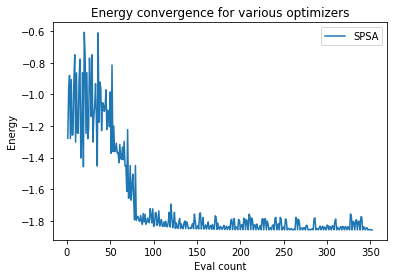

In [2]:
from suffix_averaging import SuffixAveragingOptimizer
from nft import NFT
import os
import numpy as np
import numpy as np
import GPyOpt
import pylab


#General imports
import numpy as np

#Operator Imports
from qiskit.opflow import Z, X, I, StateFn, CircuitStateFn, SummedOp
from qiskit.opflow.gradients import Gradient, NaturalGradient, QFI, Hessian

#Circuit imports
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter, ParameterVector, ParameterExpression
from qiskit.circuit.library import EfficientSU2

from qiskit import Aer
from qiskit.opflow import X, Z, I

#Operator Imports
from qiskit.opflow import StateFn, CircuitStateFn, SummedOp
from qiskit.opflow.gradients import Gradient, NaturalGradient, QFI, Hessian

from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP, SPSA
from qiskit.circuit.library import TwoLocal

#optimizers = [NFT(maxiter=60)]
optimizers = [SPSA(maxiter=1000)]
converge_cnts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

H2_op = (-1.052373245772859 * I ^ I) + \
        (0.39793742484318045 * I ^ Z) + \
        (-0.39793742484318045 * Z ^ I) + \
        (-0.01128010425623538 * Z ^ Z) + \
        (0.18093119978423156 * X ^ X)

for i, optimizer in enumerate(optimizers):
    print('\rOptimizer: {}        '.format(type(optimizer).__name__), end='')
    algorithm_globals.random_seed = 50
    ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')

    counts = []
    values = []
    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    path = os.getcwd()
    filename = "circ_params_SPSA"
    suffix_optimizer = SuffixAveragingOptimizer(optimizer, "SPSA",suffix_dir = path, suffix_filename = filename, save_params=True, alpha = 0.1)

    vqe = VQE(ansatz, suffix_optimizer, callback=store_intermediate_result,
              quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
    result = vqe.compute_minimum_eigenvalue(operator=H2_op)
    #suffix_optimizer.save_circ_params()
    #circ_params = suffix_optimizer.read_circ_params()
    converge_cnts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)
print('\rOptimization complete')
pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_cnts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel('Eval count')
pylab.ylabel('Energy')
pylab.title('Energy convergence for various optimizers')
pylab.legend(loc='upper right')
print(result.optimal_point)
print(result.optimal_value)